<a href="https://colab.research.google.com/github/kailashshirke/DS-Assignments/blob/main/simple_linear_regression_q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn import linear_model

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df=pd.read_csv('delivery_time.csv')

In [3]:
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


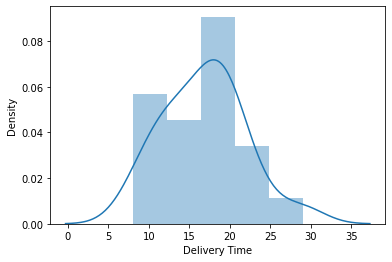

In [5]:
sns.distplot(df['Delivery Time'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


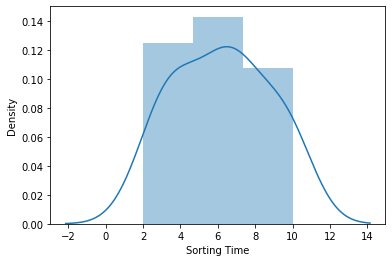

In [6]:
sns.distplot(df['Sorting Time'])

In [7]:
df=df.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
df

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [8]:
df.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


                             OLS Regression Results                            
Dep. Variable:     df['delivery_time']   R-squared:                       0.682
Model:                             OLS   Adj. R-squared:                  0.666
Method:                  Least Squares   F-statistic:                     40.80
Date:                 Tue, 25 Jan 2022   Prob (F-statistic):           3.98e-06
Time:                         09:18:57   Log-Likelihood:                -51.357
No. Observations:                   21   AIC:                             106.7
Df Residuals:                       19   BIC:                             108.8
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              6.5

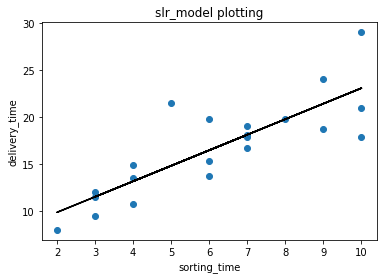

In [9]:
slr_model=smf.ols("df['delivery_time']~df['sorting_time']",data=df).fit()
print(slr_model.summary())
predict=slr_model.predict(df.iloc[:,1])
import matplotlib.pylab as plt
plt.scatter(x=df['sorting_time'],y=df['delivery_time'])
plt.plot(df['sorting_time'],predict,color='black')
plt.xlabel("sorting_time")
plt.ylabel("delivery_time")
plt.title("slr_model plotting")
plt.show()

                             OLS Regression Results                            
Dep. Variable:     df['delivery_time']   R-squared:                       0.695
Model:                             OLS   Adj. R-squared:                  0.679
Method:                  Least Squares   F-statistic:                     43.39
Date:                 Tue, 25 Jan 2022   Prob (F-statistic):           2.64e-06
Time:                         09:19:39   Log-Likelihood:                -50.912
No. Observations:                   21   AIC:                             105.8
Df Residuals:                       19   BIC:                             107.9
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept 

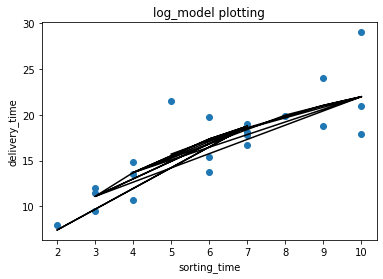

In [10]:
log_model=smf.ols("df['delivery_time']~np.log(df['sorting_time'])",data=df).fit()
print(log_model.summary())
log_predict=log_model.predict(pd.DataFrame(df['sorting_time']))

import matplotlib.pylab as plt
%matplotlib inline
plt.scatter(x=df['sorting_time'],y=df['delivery_time'])
plt.plot(df['sorting_time'],log_predict,color='black')
plt.xlabel("sorting_time")
plt.ylabel("delivery_time")
plt.title("log_model plotting")
plt.show()

                                 OLS Regression Results                                
Dep. Variable:     np.log(df['delivery_time'])   R-squared:                       0.711
Model:                                     OLS   Adj. R-squared:                  0.696
Method:                          Least Squares   F-statistic:                     46.73
Date:                         Tue, 25 Jan 2022   Prob (F-statistic):           1.59e-06
Time:                                 09:20:53   Log-Likelihood:                 7.7920
No. Observations:                           21   AIC:                            -11.58
Df Residuals:                               19   BIC:                            -9.495
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

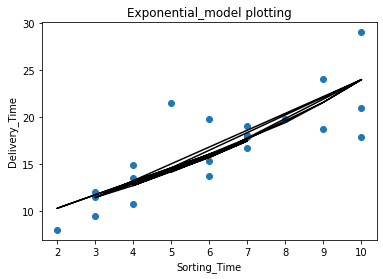

In [11]:
exp_model=smf.ols("np.log(df['delivery_time'])~(df['sorting_time'])",data=df).fit()
print(exp_model.summary())
predict_exp=exp_model.predict(pd.DataFrame(df['sorting_time']))
pred_exp=np.exp(predict_exp)

import matplotlib.pylab as plt
%matplotlib inline
plt.scatter(x=df['sorting_time'],y=df['delivery_time'])
plt.plot(df['sorting_time'],np.exp(predict_exp),color='black')
plt.title("Exponential_model plotting")
plt.xlabel("Sorting_Time")
plt.ylabel("Delivery_Time")
plt.show()

In [12]:
simple_regression=linear_model.LinearRegression()
simple_regression.fit(df[['sorting_time']],df.delivery_time)

print("Coefficent M: ",simple_regression.coef_)
print("intercept 'B': ",simple_regression.intercept_)

flag=True
while(flag):
    myinput=int(input("sorting_time: "))
    myoutput=simple_regression.predict([[myinput]])
    print("delivery_time: ",myoutput)
    flag = int(input("press 1 to continue or Press 0 to exit : "))

Coefficent M:  [1.6490199]
intercept 'B':  6.58273397199706
sorting_time: 10


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


delivery_time:  [23.07293294]
press 1 to continue or Press 0 to exit : 1
sorting_time: 0


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


delivery_time:  [6.58273397]
press 1 to continue or Press 0 to exit : 0


In [13]:
np.sqrt(np.mean((df.delivery_time-predict)**2))

2.7916503270617654

In [14]:
np.sqrt(np.mean((df.delivery_time-predict_exp)**2))

14.795516941016686

In [15]:
np.sqrt(np.mean((df.delivery_time-log_predict)**2))

2.733171476682066